# 7. Functions

In the previous chapter we developped a small procedure to segment our image of nuclei. If you develop such a routine you are going to re-use it multiple times, so it makes sense to package it into a re-usable unit.

We will summarize here how to achieve that in this brief chapter.

In [3]:
#importing packages
import numpy as np
import matplotlib.pyplot as plt
plt.gray();

from skimage.external.tifffile import TiffFile

import skimage.morphology as skm
import skimage.filters as skf

<Figure size 432x288 with 0 Axes>

In [4]:
#load the image to process
data = TiffFile('Data/30567/30567.tif')
image = data.pages[3].asarray()

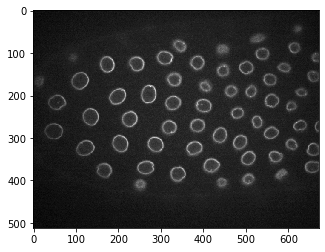

In [9]:
plt.imshow(image);

Let us summarize all the necessary steps within one code block

In [6]:
from skimage.measure import label, regionprops

#median filter
image_med = skf.rank.median(image,selem=np.ones((2,2)))
#otsu thresholding
image_local_threshold = skf.threshold_local(image_med,block_size=51)
image_local = image > image_local_threshold
#remove tiny features
image_local_eroded = skm.binary_erosion(image_local, selem= skm.disk(1))
#label image
image_labeled = label(image_local_eroded)
#analyze regions
our_regions = regionprops(image_labeled)
#create a new mask with constraints on the regions to keep
newimage = np.zeros(image.shape)
#fill in using region coordinates
for x in our_regions:
    if (x.area>200):# and (x.eccentricity<0.8):
        newimage[x.coords[:,0],x.coords[:,1]] = 1

/Users/gw18g940/miniconda3/envs/improc_env/lib/python3.7/site-packages/skimage/filters/rank/generic.py:119: UserWarning: Bad rank filter performance is expected due to a large number of bins (20304), equivalent to an approximate bitdepth of 14.3.
  out_dtype)


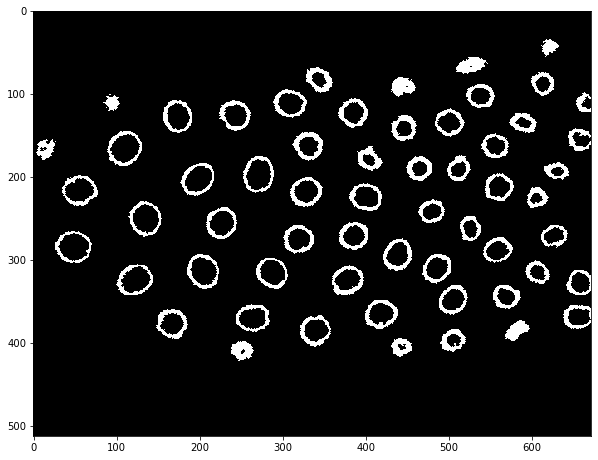

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(newimage)

We can now make a function out of it. You can choose the "level" of your function depending on your needs. For example you could pass a filename and a plane index to the function and make it import your data, or you can pass directly an image.

In addition to the image, you coud pass other arguments if you want to make your function more general. For example, you might not always want to filter objects of the same size or shape, and so you can set those as parameters:

In [10]:
from skimage.measure import label, regionprops

def detect_nuclei(image, size = 200, shape = 0.8):
    #median filter
    image_med = skf.rank.median(image,selem=np.ones((2,2)))
    #otsu thresholding
    image_local_threshold = skf.threshold_local(image_med,block_size=51)
    image_local = image > image_local_threshold
    #remove tiny features
    image_local_eroded = skm.binary_erosion(image_local, selem= skm.disk(1))
    #label image
    image_labeled = label(image_local_eroded)
    #analyze regions
    our_regions = regionprops(image_labeled)
    #create a new mask with constraints on the regions to keep
    newimage = np.zeros(image.shape)
    #fill in using region coordinates
    for x in our_regions:
        if (x.area>size) and (x.eccentricity<shape):
            newimage[x.coords[:,0],x.coords[:,1]] = 1
            
    return newimage

And now we can test the function (which appears also now in autocompletion):

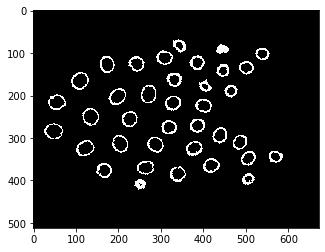

In [13]:
nuclei = detect_nuclei(image, size = 400)
plt.imshow(nuclei);

In order to avoid cluttering your notebooks with function definitions and to be able to reuse your functions across multiple notebooks, I also strongly advise you to create your own module files. Those are .py files that group multipe functions and that can be called from any notebook.

Let's create one, call it my_module.py and copy our function in it. Now we can use the function like this:

In [1]:
import my_module
#or alternatively: from my_module import detect_nuclei

In [2]:
nuclei2 = my_module.detect_nuclei(image)

NameError: name 'image' is not defined

We get an error because in that module, we use skimage functions that were not imported **in the module itself**. We have them in the notebook, but they are not accessible from there. We thus restart the kernel as re-loading a module doesn't work:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.gray();
from skimage.external.tifffile import TiffFile

data = TiffFile('Data/30567/30567.tif')
image = data.pages[3].asarray()

import my_module
nuclei2 = my_module.detect_nuclei(image)

/Users/gw18g940/miniconda3/envs/improc_env/lib/python3.7/site-packages/skimage/filters/rank/generic.py:119: UserWarning: Bad rank filter performance is expected due to a large number of bins (20304), equivalent to an approximate bitdepth of 14.3.
  out_dtype)


<Figure size 432x288 with 0 Axes>

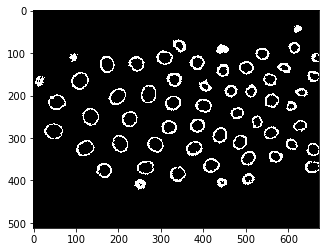

In [4]:
plt.imshow(nuclei2);

Your own modules are accessible if they are in the same folder as your notebook or on some path recognized by Python (on the PYTHONPATH). For more details see [here](https://docs.python.org/3.3/tutorial/modules.html).